<a href="https://colab.research.google.com/github/HARSHA4580/youtube_comment_analysis/blob/main/youtube_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import files
uploaded = files.upload()  # Upload 'youtube_comments.csv'

# Load CSV
df = pd.read_csv('/content/YoutubeCommentsDataSet.csv')  # Replace with your CSV filename
df.head()


Saving YoutubeCommentsDataSet.csv to YoutubeCommentsDataSet (1).csv


,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [5]:
# Load the uploaded CSV
import io
file_name = list(uploaded.keys())[0]  # Automatically get uploaded file name
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Show first few rows
df.head()



,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [7]:
# List all columns
print("Columns in your CSV:", df.columns.tolist())

# Ask user to select the column names if not standard
comment_col = input("Enter the column name for comments/text: ")
sentiment_col = input("Enter the column name for sentiment/labels: ")

# Optional: Preview selected columns
df = df[[comment_col, sentiment_col]]
df.head()



Columns in your CSV: ['Comment', 'Sentiment']
Enter the column name for comments/text: Comment
Enter the column name for sentiment/labels: Sentiment


,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [8]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)                  # Remove mentions/hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)              # Remove punctuation/numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['clean_comment'] = df[comment_col].apply(clean_text)
df.head()


,Comment,Sentiment,clean_comment
0,lets not forget that apple pay in 2014 require...,neutral,lets forget apple pay required brand new iphon...
1,here in nz 50 of retailers don’t even have con...,negative,nz retailers dont even contactless credit card...
2,i will forever acknowledge this channel with t...,positive,forever acknowledge channel help lessons ideas...
3,whenever i go to a place that doesn’t take app...,negative,whenever go place doesnt take apple pay doesnt...
4,apple pay is so convenient secure and easy to ...,positive,apple pay convenient secure easy use used kore...


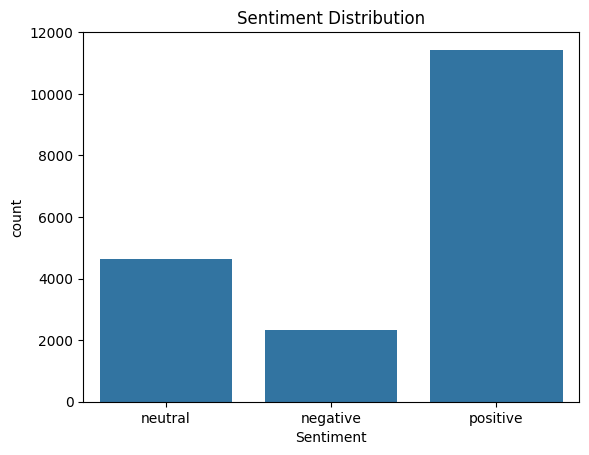

In [9]:
sns.countplot(x=sentiment_col, data=df)
plt.title("Sentiment Distribution")
plt.show()


In [10]:
X = df['clean_comment']
y = df[sentiment_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [12]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [13]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

Accuracy: 0.675991309071157

Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.15      0.26       475
     neutral       0.67      0.25      0.37       937
    positive       0.67      0.96      0.79      2270

    accuracy                           0.68      3682
   macro avg       0.70      0.46      0.47      3682
weighted avg       0.68      0.68      0.61      3682



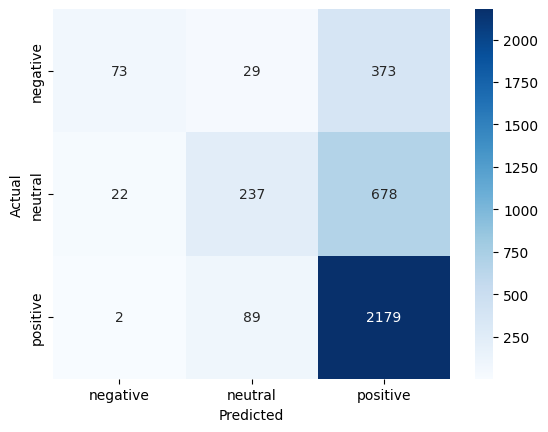

In [14]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
def predict_sentiment(comment):
    comment_clean = clean_text(comment)
    comment_vec = tfidf.transform([comment_clean])
    pred = model.predict(comment_vec)
    return pred[0]

# Test your own comment
new_comment = input("Enter a comment to predict sentiment: ")
print("Predicted Sentiment:", predict_sentiment(new_comment))


Enter a comment to predict sentiment: linus this is not a table also linus lets use this as a chair
Predicted Sentiment: positive
